## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio. 

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*. 

Question *7* is about data ethics issue.

In [834]:
your_name = "Namah Kumar"
your_student_id = "47608811"

In [835]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [837]:
#Question 1
#Reading 'car_sells_clean_data.csv and listing the length
cars = pd.read_csv('car_sells_clean_data.csv')
print("Total length of cars:", cars.shape[0])

Total length of cars: 3657


### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [839]:
# Question 2
#Displaying Data About Cars
print(cars.head())
print(cars.info())

                       name    year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007.0          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007.0         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012.0         600000     100000  Diesel   
3    Datsun RediGO T Option  2017.0         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014.0         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3

In [840]:
#Question 2.1
#Coverting Data Types
from sklearn.preprocessing import OrdinalEncoder
ord_enc= OrdinalEncoder()

#Data Types
print(cars.dtypes)

#Convert Object Columns
Object_cars = cars.select_dtypes(include=['object']).copy()

#Covert Object Columns into integer values
for column in Object_cars.columns:
    Object_cars[column + "_code"] = ord_enc.fit_transform(Object_cars[[column]]).ravel()

Object_cars['year']=cars['year']
Object_cars['selling_price'] = cars['selling_price']
Object_cars['km_driven']=cars['km_driven']

#check conversions
print(Object_cars.dtypes)

Correlation = Object_cars[['year','selling_price','km_driven','fuel_code','owner_code','seller_type_code']].corr()
print(Correlation)

#Explanation of Correlations
print("--------------------------------------------------------------------")
print("Explanation of Correlations")
print("""The correlations detailed below give information about how strongly impacted one data set is by another. A strong correlation is 0.6+
which indicates a deep impact. A correlation of 1 shows that data sets are the same. Below we can see that year and selling price are the
most correlated.""")

#Explanation of most and least correlated figures compared to selling price
print("--------------------------------------------------------------------")
print("in order from most to least correlated:")
print("""selling_price=1.000000
year=0.411103
km driven=-0.177203
owner code=-0.205524 
fuel code=-0.277627""")  


#Disscussion of correlation and its impact on the final results
print("--------------------------------------------------------------------")
print("Disscussion of correlation and its impact on the final results:")
print(""" the correlations shown above will both positively and negatively impact the regression model.
The stronger the correlation, the more impact on the regression model.""")

name              object
year             float64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
dtype: object
name                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
name_code            float64
fuel_code            float64
seller_type_code     float64
transmission_code    float64
owner_code           float64
year                 float64
selling_price          int64
km_driven              int64
dtype: object
                      year  selling_price  km_driven  fuel_code  owner_code  \
year              1.000000       0.411103  -0.404058  -0.118542   -0.433406   
selling_price     0.411103       1.000000  -0.177203  -0.277627   -0.205524   
km_driven        -0.404058      -0.177203   1.000000  -0.297764    0.306730   
fuel_code        -0.118542      -0.277627  -0.297764   1.000000   -0.017217   


### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [842]:
#Question 3

#Splitting the training models
from sklearn.model_selection import train_test_split

X=Object_cars [['year','km_driven','fuel_code','owner_code','seller_type_code']]
y=Object_cars['selling_price']

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X,y,test_size=0.1)
print("Result after training from 10% of the data:", X_train_10.shape, X_test_10.shape)

X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X,y,test_size=0.9)
print("Result after training from 90% of the data:", X_train_90.shape, X_test_90.shape)

Result after training from 10% of the data: (3291, 5) (366, 5)
Result after training from 90% of the data: (365, 5) (3292, 5)


### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [844]:
#Question 4A
#training models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_most1=Object_cars[['year','km_driven']]
y=Object_cars['selling_price']

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_most1,y,test_size=0.1) # training from 10%

model_a=LinearRegression()
model_a.fit(X_train_10,y_train_10)
predicted_a=model_a.predict(X_test_10)

In [845]:
#Question 4B

X_least1=Object_cars[['fuel_code','owner_code']]
y=Object_cars['selling_price']

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_least1,y,test_size=0.1) #training from 10%

model_b=LinearRegression()
model_b.fit(X_train_10,y_train_10)
predicted_b=model_b.predict(X_test_10)

In [846]:
#Question 4C

X_most2=Object_cars[['year','km_driven']]
y=Object_cars['selling_price']

X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_most2,y,test_size=0.9) #training from 90%

model_c=LinearRegression()
model_c.fit(X_train_90,y_train_90)
predicted_c=model_c.predict(X_test_90)

In [847]:
#Question 4D

X_least2=Object_cars[['fuel_code','owner_code']]
y=Object_cars['selling_price']

X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_least2,y,test_size=0.9) #training from 90%

model_d=LinearRegression()
model_d.fit(X_train_90,y_train_90)
predicted_d=model_d.predict(X_test_90)

### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [849]:
#Question 5: Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# from Model 4A

MSE_a= mean_squared_error(y_test_10, predicted_a)
RMSE_a=np.sqrt(MSE_a)
print("Mean Squared Error for Model A:", MSE_a)
print("Root Mean Squared Error for Model A:", RMSE_a)

#From Model 4B
MSE_b= mean_squared_error(y_test_10, predicted_b)
RMSE_b=np.sqrt(MSE_b)
print("-----------------------------------------------------")
print("Mean Squared Error for Model B:", MSE_b)
print("Root Mean Squared Error for Model B:", RMSE_b)

#From Model 4C

MSE_c= mean_squared_error(y_test_90, predicted_c)
RMSE_c=np.sqrt(MSE_c)
print("-----------------------------------------------------")
print("Mean Squared Error for Model C:", MSE_c)
print("Root Mean Squared Error for Model C:", RMSE_c)

#From Model 4D

MSE_d= mean_squared_error(y_test_90, predicted_d)
RMSE_d=np.sqrt(MSE_d)
print("-----------------------------------------------------")
print("Mean Squared Error for Model D:", MSE_d)
print("Root Mean Squared Error for Model D:", RMSE_d)



Mean Squared Error for Model A: 409466022000.81555
Root Mean Squared Error for Model A: 639895.3211274603
-----------------------------------------------------
Mean Squared Error for Model B: 281174359777.1032
Root Mean Squared Error for Model B: 530258.7668083416
-----------------------------------------------------
Mean Squared Error for Model C: 368506854492.1813
Root Mean Squared Error for Model C: 607047.6542184982
-----------------------------------------------------
Mean Squared Error for Model D: 293210363884.0454
Root Mean Squared Error for Model D: 541489.0247124548


### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

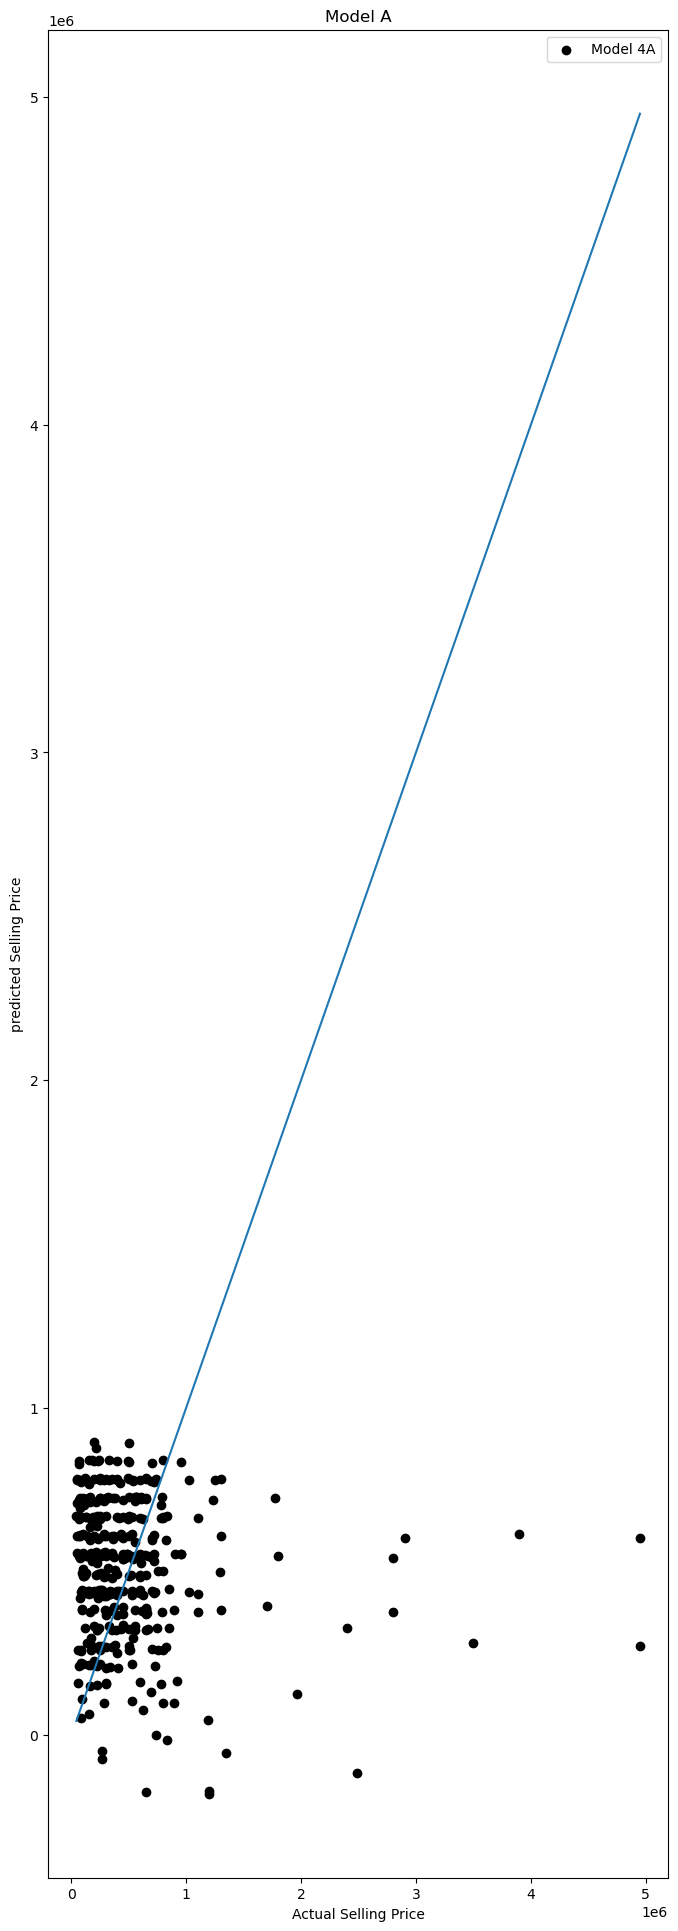

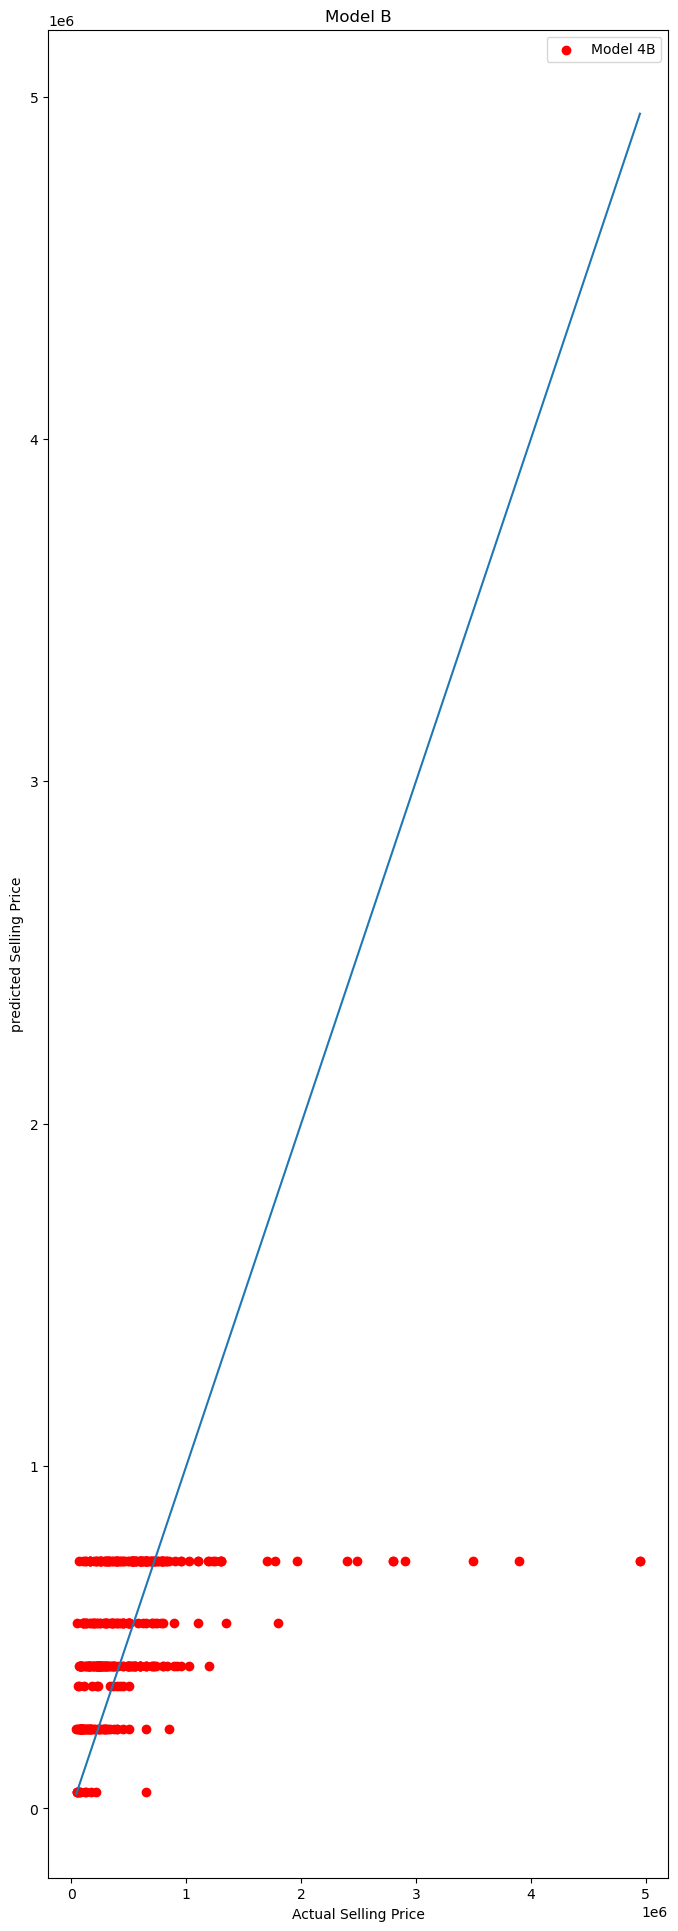

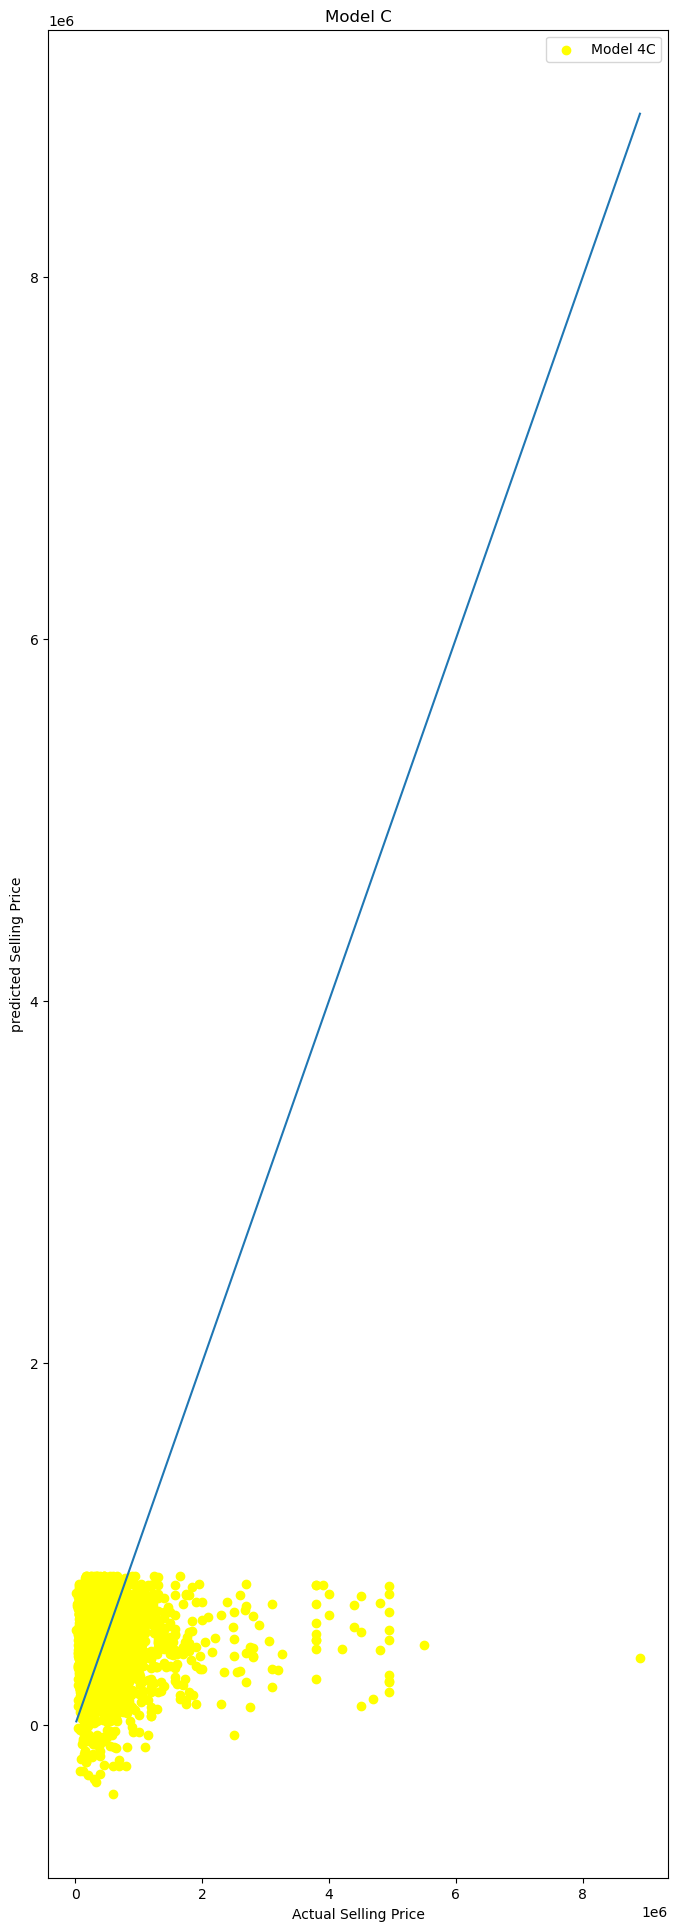

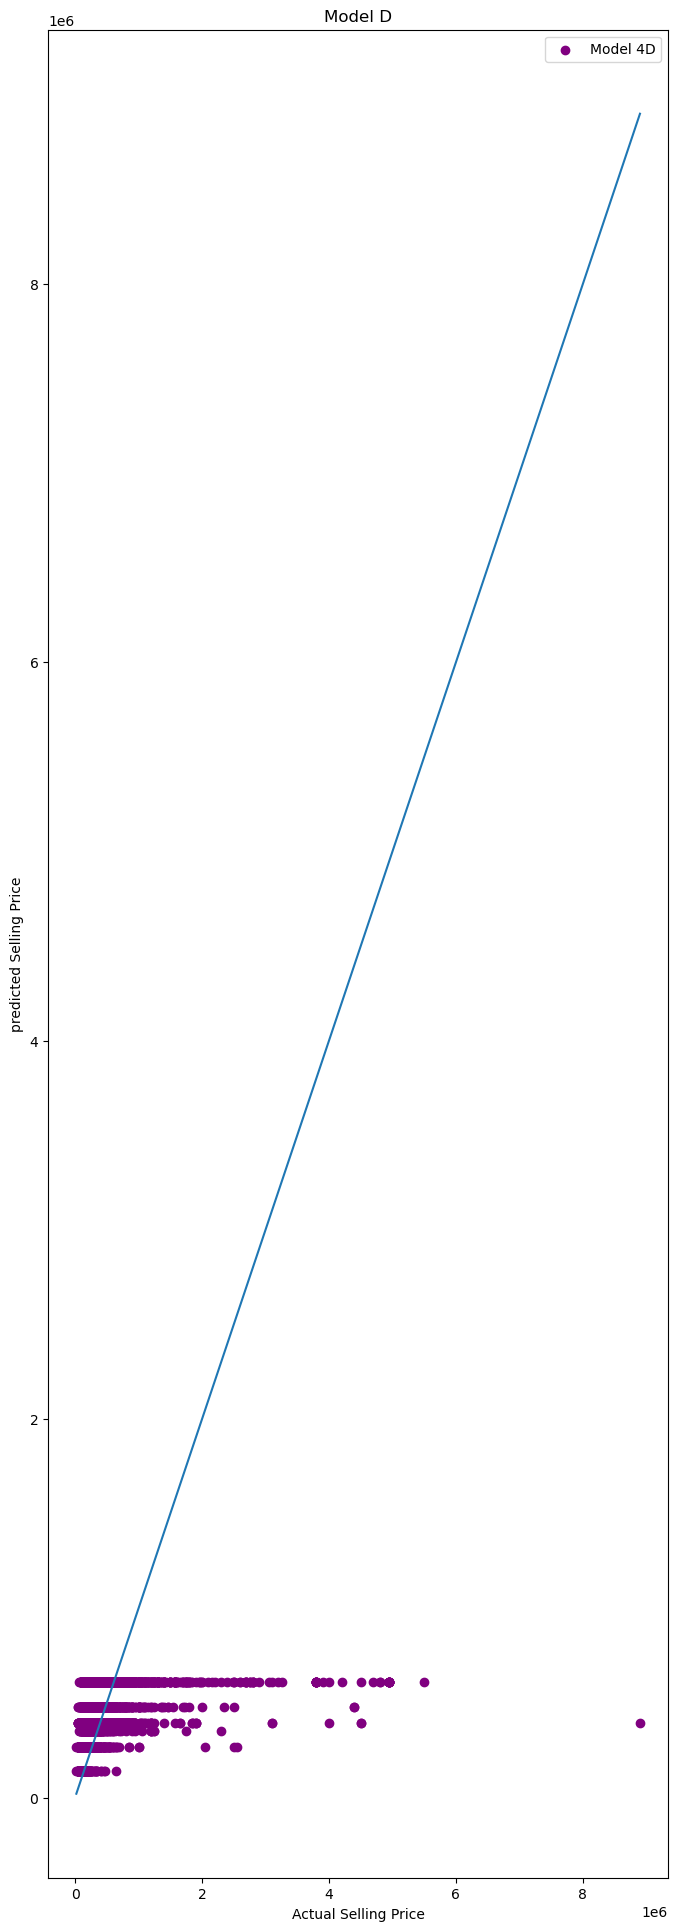

In [851]:
#Question 6: Visualisation of results
import seaborn as sns
import matplotlib.pyplot as plt

#Plot for 4A
plt.figure(figsize=(8,24))
plt.scatter(y_test_10, predicted_a, color="black", label='Model 4A')
plt.plot([y_test_10.min(), y_test_10.max()], (y_test_10.min(), y_test_10.max()))
plt.xlabel('Actual Selling Price')
plt.ylabel('predicted Selling Price')
plt.title('Model A')
plt.legend()
plt.show()

#Plot for 4B
plt.figure(figsize=(8,24))
plt.scatter(y_test_10, predicted_b, color="red", label='Model 4B')
plt.plot([y_test_10.min(), y_test_10.max()], (y_test_10.min(), y_test_10.max()))
plt.xlabel('Actual Selling Price')
plt.ylabel('predicted Selling Price')
plt.title('Model B')
plt.legend()
plt.show()

#Plot for 4C
plt.figure(figsize=(8,24))
plt.scatter(y_test_90, predicted_c, color="yellow", label='Model 4C')
plt.plot([y_test_90.min(), y_test_90.max()], (y_test_90.min(), y_test_90.max()))
plt.xlabel('Actual Selling Price')
plt.ylabel('predicted Selling Price')
plt.title('Model C')
plt.legend()
plt.show()

#Plot for 4D
plt.figure(figsize=(8,24))
plt.scatter(y_test_90, predicted_d, color="purple", label='Model 4D')
plt.plot([y_test_90.min(), y_test_90.max()], (y_test_90.min(), y_test_90.max()))
plt.xlabel('Actual Selling Price')
plt.ylabel('predicted Selling Price')
plt.title('Model D')
plt.legend()
plt.show()

#Analysis
# after analysing the graphs it may be observed that Graph A yielded the most correspondance between actual and predicted selling prices. In this case,
# the graph with the most training did yield the best results which is surprising. This may be due to an array of reasons such as skewed data, outliers
#or maybe portion of this code has been completed incorrectly. The graphs do not look correct which leads me to believe that I have created a fault
#somewhere within my code.


### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


In [853]:
# Evaluation 
#Infographics are tools, utilised to display and interpret data so that meaning may be derived from it.
#Though this is true, infographics and data can be manipulated in order to convey a wanted message or to push an agenda.
#Due to this, data shown may mislead an audience though not technically incorrect. 
#The infographic shown above is one such example of this, as whilst both tables are correct, they portray different agendas.
#Table 1 sorts by looking at the total number of medals won whilst table 2 sorts by gold medals one.
#Sorting, either way, may create bias an emphasis on either gold or total medals creates different perceptions of success. 
#It is crucial to understand what metrics data is being compared to, allowing an audience to understand what is being presented.
#Without transparency, data may be interpreted in a way that does not tell the full picture.